온,습도,조도,CO2농도에 따른 객실의 사용유무 판별\
종속변수 Occupancy, 0: 비어있음 , 1: 사용중

1-(1) 데이터 EDA 수행 후, 분석가 입장에서 의미있는 탐색

In [1]:
import pandas as pd
import numpy as np
data=pd.read_csv('problem1.csv')

C:\Users\taeeu\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\taeeu\anaconda3\lib\site-packages\numpy\.libs\libopenblas.el2c6ple4zyw3eceviv3oxxgrn2nrfm2.gfortran-win_amd64.dll
C:\Users\taeeu\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17910 entries, 0 to 17909
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           17910 non-null  object 
 1   Temperature    17910 non-null  float64
 2   Humidity       17910 non-null  float64
 3   Light          17910 non-null  float64
 4   CO2            17889 non-null  float64
 5   HumidityRatio  17910 non-null  float64
 6   Occupancy      17910 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 979.6+ KB


데이터타입 설명 : 종속변수는 int형(범주형변수), 독립변수 중 date는 object로 나머지 독립변수는 float형태로 구성되어 있다. date컬럼은 object로 인식되어 있으므로 datetime으로 변환해줄 필요가 있어보인다.

In [3]:
data.isna().sum()

date              0
Temperature       0
Humidity          0
Light             0
CO2              21
HumidityRatio     0
Occupancy         0
dtype: int64

CO2컬럼(수치형변수)에만 21개의 결측치가 있다

In [4]:
data[data['CO2'].isnull()]['date']

1283     2015-02-03 19:09:59
1304     2015-02-03 19:31:00
2136     2015-02-04 18:08:00
2856     2015-02-05 06:08:00
3239     2015-02-05 16:09:59
6683     2015-02-08 08:06:00
6911     2015-02-08 11:54:00
7456     2015-02-08 20:58:59
8002     2015-02-09 06:04:59
8088     2015-02-09 07:31:00
8106     2015-02-09 07:49:00
9243     2015-02-10 07:53:59
9781     2015-02-12 00:34:00
10329    2015-02-12 10:53:00
10565    2015-02-12 15:04:00
10855    2015-02-12 20:38:00
12152    2015-02-13 22:53:59
14660    2015-02-15 16:41:59
15152    2015-02-16 00:53:59
16328    2015-02-17 01:56:00
17736    2015-02-18 06:20:00
Name: date, dtype: object

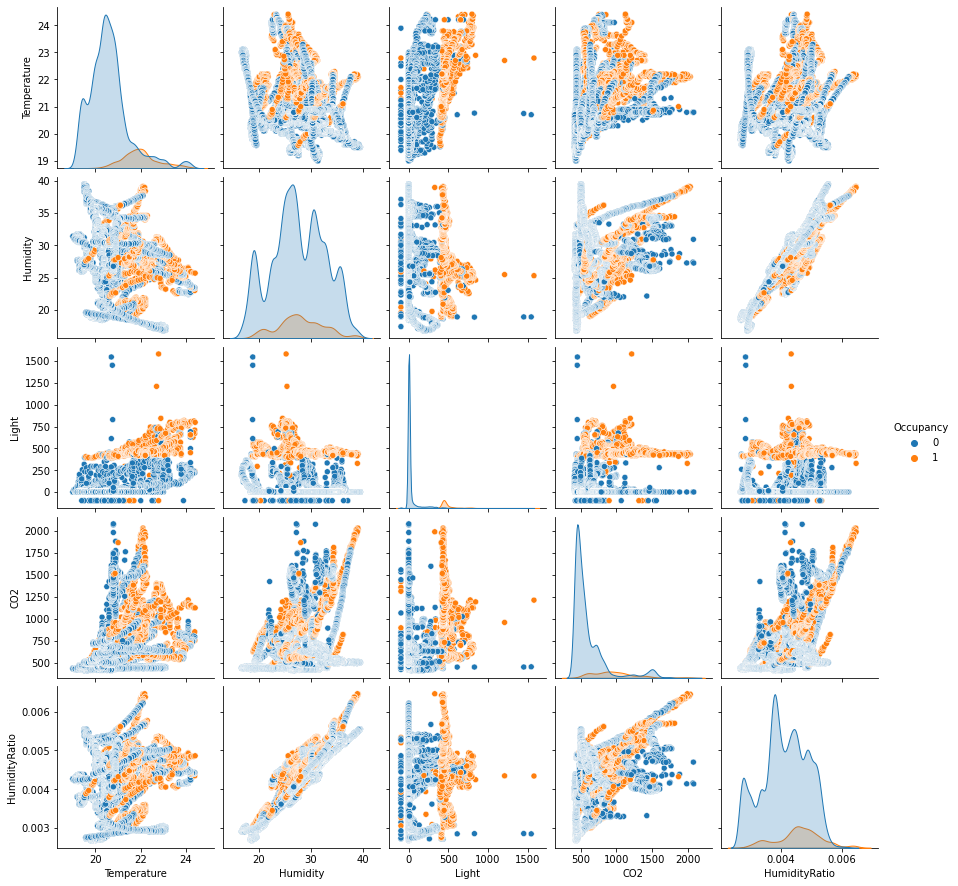

In [5]:
import seaborn as sns
sns.pairplot(data, diag_kind='auto', hue='Occupancy')

Humidity와 HumidtyRatio컬럼은 시각화 했을 때 높은 상관관계를 보이며, 두 컬럼을 제외한 나머지 데이터의 경우 이상치가 상대적으로 많이 존재하는 것으로 확인됨

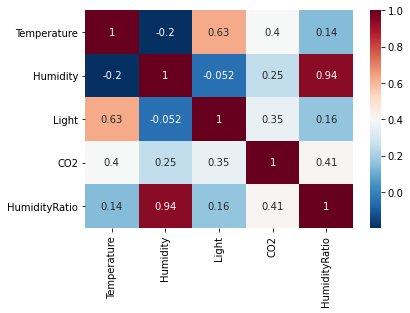

In [6]:
import matplotlib.pyplot as plt
data_corr=data.drop(columns='Occupancy').corr(method='pearson')
sns.heatmap(data_corr, xticklabels=data_corr.columns, yticklabels=data_corr.columns, cmap='RdBu_r', annot=True)
plt.show()

Humidity와 HumidtyRatio는 높은 상관관계를 보이고 다중공선성이 있다고 판단함(?)

In [7]:
X=data.drop(columns=['Occupancy','date'])
df_v1=pd.melt(X, var_name='col', value_name='value')
df_v1

,col,value
0,Temperature,23.718000
1,Temperature,23.722500
2,Temperature,23.754000
3,Temperature,23.760000
4,Temperature,23.754000
...,...,...
89545,HumidityRatio,0.004061
89546,HumidityRatio,0.004058
89547,HumidityRatio,0.004213
89548,HumidityRatio,0.004230


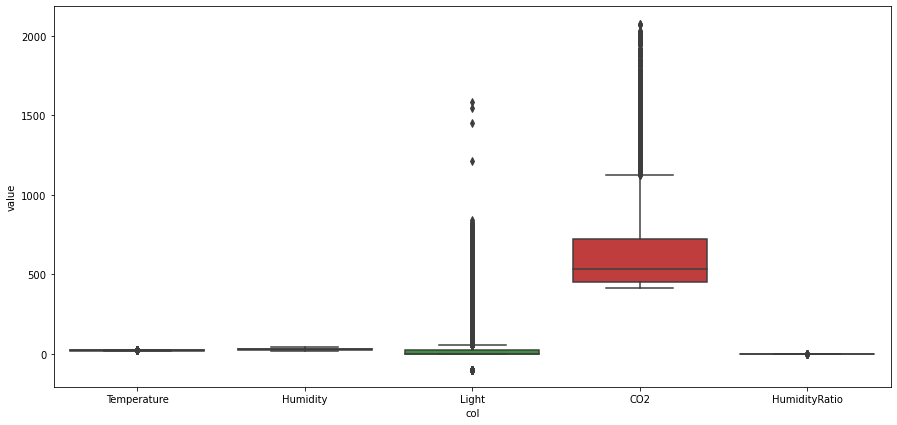

In [8]:
plt.figure(figsize=(15,7))
sns.boxplot(x='col', y='value', data=df_v1)
plt.xticks(range(5), X.columns)
plt.show()

In [9]:
display(data.describe())

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,17910.000000,17910.000000,17910.000000,17889.000000,17910.000000,17910.000000
mean,20.749036,27.589163,78.157369,647.700865,0.004175,0.117253
std,0.994012,5.043595,168.574068,285.997340,0.000755,0.321730
min,19.000000,16.745000,-99.000000,412.750000,0.002674,0.000000
25%,20.100000,24.390000,0.000000,453.000000,0.003702,0.000000
50%,20.600000,27.200000,0.000000,532.666667,0.004222,0.000000
75%,21.200000,31.290000,22.000000,722.000000,0.004790,0.000000
max,24.408333,39.500000,1581.000000,2076.500000,0.006461,1.000000


In [10]:
len(data[data['Light']<0])
#Light컬럼에서 0보다 작은 row는 50개

50

In [11]:
data[data['Light']<0].head()
#-99값을 가지고 있음

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
97,2015-02-02 17:35:00,22.60,25.20,-99.0,853.0,0.004272,0
1177,2015-02-03 16:08:59,22.79,30.81,-99.0,1356.6,0.005293,1
1250,2015-02-03 18:36:59,22.00,29.39,-99.0,1066.0,0.004808,0
1692,2015-02-04 01:59:00,20.70,25.10,-99.0,509.0,0.003786,0
2296,2015-02-04 20:48:00,21.60,26.50,-99.0,514.0,0.004227,0


In [12]:
data['date']=pd.to_datetime(data['date'])

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17910 entries, 0 to 17909
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           17910 non-null  datetime64[ns]
 1   Temperature    17910 non-null  float64       
 2   Humidity       17910 non-null  float64       
 3   Light          17910 non-null  float64       
 4   CO2            17889 non-null  float64       
 5   HumidityRatio  17910 non-null  float64       
 6   Occupancy      17910 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 979.6 KB


In [16]:
timedeltas = data['date'].diff().dt.seconds.dropna()
#결측치 제외하고 초를 기준으로 차분
timedeltas.describe()
#연속되는 데이터 간의 시간차이(초)로 환산 

count    17909.000000
mean        71.357474
std        241.363584
min         59.000000
25%         60.000000
50%         60.000000
75%         61.000000
max      25680.000000
Name: date, dtype: float64

75%데이터가 연속하는 데이터 사이에 61초 이내의 시간 차이를 가지고 있다.\
연속된 데이터 간의 최대 시간차이는 25680초로 대략 7시간 차이가 존재한다.\
시계열 데이터로 데이터를 해석할 경우 이 사이 시간들은 결측치로 볼 수 있다.